# Linearity and Convolution

## Operator or system H is linear if two properties hold:
* Additivity

H(f1 + f2) = H(f1) + H(f2)

* Multiplicaative scaling

H(a * f1) = a * H(f1)

# Cross-correlation vs Convolution

Cross-correlation:
![cross-correlation](figures/cross-correlation.png)

Convolution:
![convolution](figures/convolution.png)

For symetric filter impulse response (example ), the operations produce the same result.

![corr-conv-auto](figures/corr-conv-auto.png)

## Convolution properties:
* Linear & shift invariant
* Commutative: 

$f*g = g*f$

* Associative:

$(f*g)*h = f*(g*h)$

* Identity with unit impluse:

$e = [...,0,0,1,0,0,...]$

$f * e = f$

* Differentiation: 

$d/dx(f*g) = d/dx(f)*g$

* Computational Complexity:

$img\_width*img\_height*kernel\_width*kernel\_height$

## Separable convolutional
If filter can be factorized to two vectors, we can save a lot on computational complexity
![image.png](figures/separable.png)

## Boundary issues

![image.png](figures/boundary.png)

In [1]:
import cv2
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats
import scipy.signal
from pprint import pprint

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20, 5)

## 2D filtering (conv)

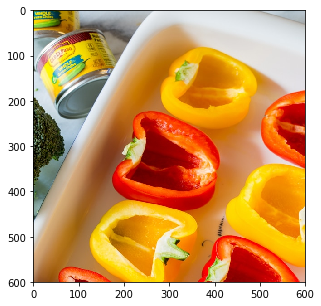

In [2]:
img = cv2.imread('peppers.png')[:,:,::-1]
plt.imshow(img);

## Borders with OpenCV

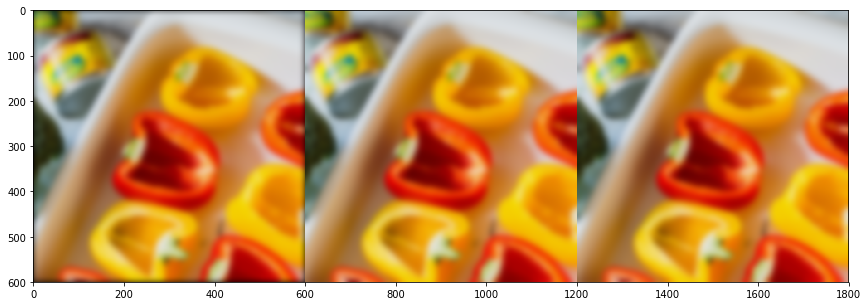

In [3]:
dst1 = cv2.GaussianBlur(img, (61,61), 7, borderType=cv2.BORDER_CONSTANT)
dst2 = cv2.GaussianBlur(img, (61,61), 7, borderType=cv2.BORDER_REPLICATE)
dst3 = cv2.GaussianBlur(img, (61,61), 7, borderType=cv2.BORDER_REFLECT)
plt.imshow(np.hstack([dst1, dst2, dst3]));

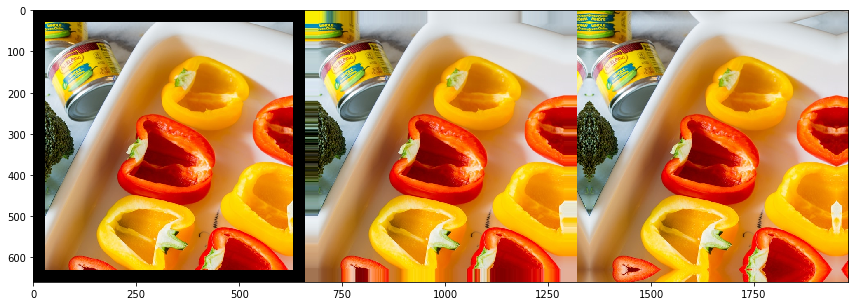

In [4]:
dst1 = cv2.copyMakeBorder(img, 30,30,30,30, borderType=cv2.BORDER_CONSTANT)
dst2 = cv2.copyMakeBorder(img, 30,30,30,30, borderType=cv2.BORDER_REPLICATE)
dst3 = cv2.copyMakeBorder(img, 30,30,30,30, borderType=cv2.BORDER_REFLECT)
plt.imshow(np.hstack([dst1, dst2, dst3]));

## Borders with SciPy (super slow)

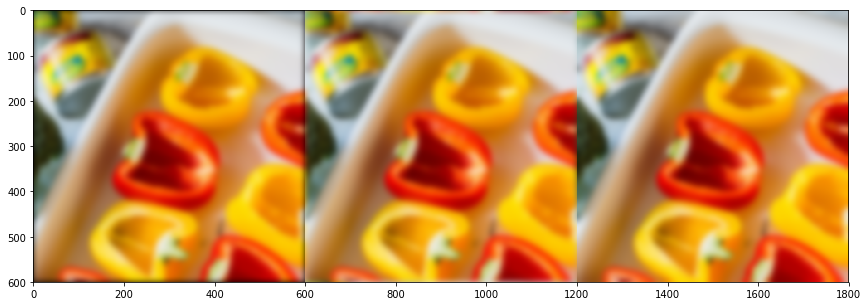

In [5]:
def make_gaussian_window(n, sigma=1):
    nn = int((n-1)/2)
    a = np.asarray([[x**2 + y**2 for x in range(-nn,nn+1)] for y in range(-nn,nn+1)])
    return np.exp(-a/(2*sigma**2))

def convolve_all_colours(im, window, mode, boundary):
    ims = []
    for d in range(3):
        im_conv_d = scipy.signal.convolve2d(im[:,:,d], window, mode=mode, boundary=boundary)
        ims.append(im_conv_d)
    return np.stack(ims, axis=2).astype("uint8")

kernel = make_gaussian_window(61,sigma=7)
kernel /= np.sum(kernel)
dst1 = convolve_all_colours(img, kernel, mode='same', boundary='fill')
dst2 = convolve_all_colours(img, kernel, mode='same', boundary='wrap')
dst3 = convolve_all_colours(img, kernel, mode='same', boundary='symm')
plt.imshow(np.hstack([dst1, dst2, dst3]));

## Sharpening

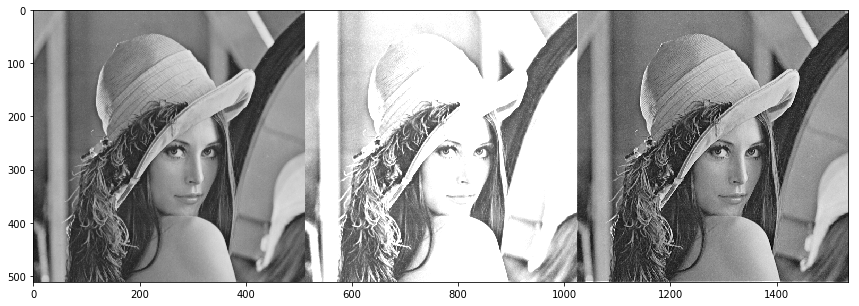

In [6]:
blur_filter = np.ones((3,3))/3**2
double_filter = np.zeros((3,3))
double_filter[1,1] = 2
sharpen_filter = double_filter - blur_filter

img = cv2.imread('lena.png')[:,:,::-1]
imgbw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
doubled_imgbw = scipy.signal.convolve2d(imgbw, double_filter, 'same')
sharpened_imgbw = scipy.signal.convolve2d(imgbw, sharpen_filter, 'same')
plt.imshow(np.hstack([imgbw, doubled_imgbw, sharpened_imgbw]), cmap='gray', vmin=0, vmax=255);

## Median filter is good for salt and pepper noise

Median filter is NOT linear
![image.png](figures/median.png)

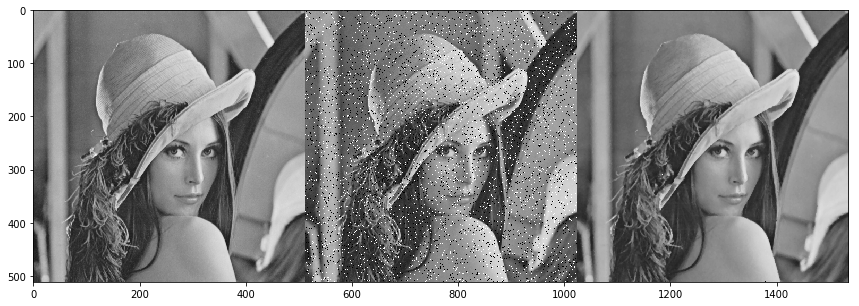

In [7]:
from random import randint
n = 10000
imgbw_saltnpepa = imgbw.copy()
for x in range(n):
    imgbw_saltnpepa[np.unravel_index(randint(0,512*512-1), (512,512))] = 255
for x in range(n):
    imgbw_saltnpepa[np.unravel_index(randint(0,512*512-1), (512,512))] = 0
imgbw_saltnpepa_medianned = cv2.medianBlur(imgbw_saltnpepa, 3)
plt.imshow(np.hstack([imgbw, imgbw_saltnpepa, imgbw_saltnpepa_medianned]), cmap='gray', vmin=0, vmax=255);

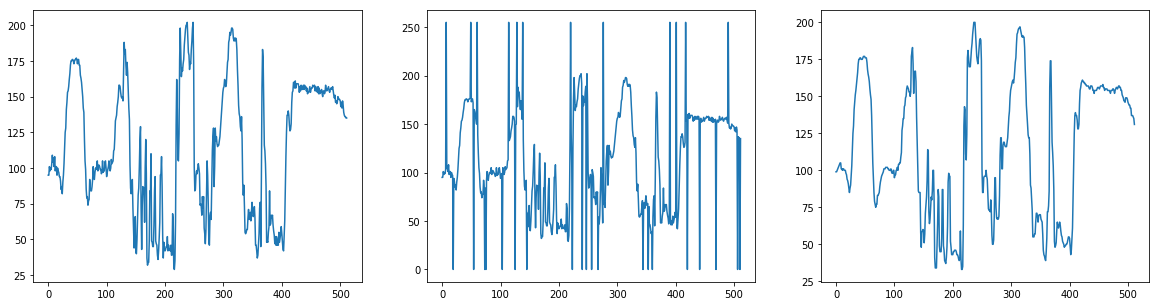

In [8]:
plt.subplot(1,3,1)
plt.plot(np.arange(512), imgbw[256,:])
plt.subplot(1,3,2)
plt.plot(np.arange(512), imgbw_saltnpepa[256,:])
plt.subplot(1,3,3)
plt.plot(np.arange(512), imgbw_saltnpepa_medianned[256,:]);

Nice property:
![image.png](figures/edge-preserving.png)